# Business School of AI
## LiveLab September 21 : Machine Learning on mobility data
- setup your environment and upload your dataset
- clean your data
- exploratory data analysis
- find dependencies between variables
- data visualisation
- predicting data points with machine learning
- refine your AI performance through feature reduction technique

#### this data analysis is done on the data record file 

In [1]:
# setup your coding environment
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#### note: if you miss any library at the import, you can install it with
!pip install libraryname
#### then run your import again

In [2]:
# rename your dataset to simplify
# upload your dataset
dockless = pd.read_csv('/Users/juliencarbonnell/Desktop/Dockless.csv')

In [3]:
# check dataset size
dockless.shape

(505993, 13)

In [4]:
# preview dataset content
dockless.head()

,TripID,StartDate,StartTime,EndDate,EndTime,TripDuration,TripDistance,StartLatitude,StartLongitude,EndLatitude,EndLongitude,DayOfWeek,HourNum
0,0000045c-2677-3a7d-4b73-cad99a57,2019-06-26,19:30,2019-06-26,19:30,3.0,0.000,38.253,-85.756,38.253,-85.755,4,19
1,0000487b-92e6-50d6-7569-42ed3818,2019-09-22,14:30,2019-09-22,14:30,5.0,0.000,38.203,-85.752,38.204,-85.751,1,14
2,00006088-2579-e0d0-6a30-a15bb878,2019-08-21,17:30,2019-08-21,17:30,6.0,0.330,38.259,-85.733,38.265,-85.739,4,17
3,00008c1a-899b-8596-970f-9f6bf495,2019-07-03,11:00,2019-07-03,11:15,6.0,0.640,38.217,-85.757,38.221,-85.763,4,11
4,00009301-3225-2aea-a84a-165a480a,2019-11-22,10:45,2019-11-22,11:00,7.0,0.599,38.215,-85.759,38.222,-85.764,6,10


### 1. Clean dataset: 
- rename header in lowercase (show error in calling it first)
- delete outliers (tripdistance == 0.000) 
- rename DayOfWeek values

In [5]:
# you want to check if trip duration column has null values
# but you mess the spelling with uppercase/lowercase (common mistake)
dockless['Tripduration'].isna().sum()
# it raises an error.

KeyError: 'Tripduration'

In [6]:
# to avoid errors in spelling, keep it simple
# rename all your headers with lowercase
dockless.columns= dockless.columns.str.lower()
dockless.head()

,tripid,startdate,starttime,enddate,endtime,tripduration,tripdistance,startlatitude,startlongitude,endlatitude,endlongitude,dayofweek,hournum
0,0000045c-2677-3a7d-4b73-cad99a57,2019-06-26,19:30,2019-06-26,19:30,3.0,0.000,38.253,-85.756,38.253,-85.755,4,19
1,0000487b-92e6-50d6-7569-42ed3818,2019-09-22,14:30,2019-09-22,14:30,5.0,0.000,38.203,-85.752,38.204,-85.751,1,14
2,00006088-2579-e0d0-6a30-a15bb878,2019-08-21,17:30,2019-08-21,17:30,6.0,0.330,38.259,-85.733,38.265,-85.739,4,17
3,00008c1a-899b-8596-970f-9f6bf495,2019-07-03,11:00,2019-07-03,11:15,6.0,0.640,38.217,-85.757,38.221,-85.763,4,11
4,00009301-3225-2aea-a84a-165a480a,2019-11-22,10:45,2019-11-22,11:00,7.0,0.599,38.215,-85.759,38.222,-85.764,6,10


In [7]:
# now check null values with simplified spelling
dockless['tripduration'].isna().sum()

0

In [8]:
# there are no null values recorded (it means each data point has a value recorded)
# but imagine you want to get rid of meaningless data points (such as trip distance = 0.00)
(dockless['tripdistance']==0).sum()

85035

In [9]:
# delete data points where trip distance == 0 (it might affect your prediction performance)
dockless = dockless[dockless['tripdistance'] != 0]

In [10]:
# check for dataset size again
dockless.shape

(420958, 13)

In [11]:
# get unique values from dayofweek column
dockless['dayofweek'].unique()
# there are 7 days in the week, alright! but which one is 1st in their calendar ?

array([4, 6, 7, 3, 1, 2, 5])

In [12]:
# import datetime module
import datetime

# from your dataset preview, fill the date where dayofweek == 1
print(datetime.date(2019,9,22).strftime('%A'))

Sunday


In [13]:
# create a dictionnary of values
days = {1: "Sunday",
        2: "Monday",
        3: "Tuesday",
        4: "Wednesday",
        5: "Thursday",
        6: "Friday",
        7: "Saturday"
       }

# replace numbers by words in column 'dayofweek'
dockless['dayofweek'] = dockless['dayofweek'].replace(days)

<ipython-input-13-bf5b11160b5d>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dockless['dayofweek'] = dockless['dayofweek'].replace(days)


In [14]:
dockless.head()

,tripid,startdate,starttime,enddate,endtime,tripduration,tripdistance,startlatitude,startlongitude,endlatitude,endlongitude,dayofweek,hournum
2,00006088-2579-e0d0-6a30-a15bb878,2019-08-21,17:30,2019-08-21,17:30,6.0,0.330,38.259,-85.733,38.265,-85.739,Wednesday,17
3,00008c1a-899b-8596-970f-9f6bf495,2019-07-03,11:00,2019-07-03,11:15,6.0,0.640,38.217,-85.757,38.221,-85.763,Wednesday,11
4,00009301-3225-2aea-a84a-165a480a,2019-11-22,10:45,2019-11-22,11:00,7.0,0.599,38.215,-85.759,38.222,-85.764,Friday,10
5,000096c8-bac3-4d6f-7ebb-30b957ee,2019-05-04,21:15,2019-05-04,21:30,7.0,0.684,38.221,-85.762,38.223,-85.764,Saturday,21
7,0000f36b-a0c7-0378-3f34-e0fb80f6,2019-05-07,17:30,2019-05-07,18:00,32.0,1.740,38.253,-85.716,38.254,-85.707,Tuesday,17


In [15]:
# check hournum column
dockless['hournum'].unique()
# there are 25 values listed since 0 and 24 are both mentioned.

array([17, 11, 10, 21, 13,  5, 18, 23, 20, 14,  8, 12, 15, 19,  7, 16,  1,
        6, 22,  9,  4,  3,  0,  2, 24])

In [16]:
# in prevention of later errors, replace 24 with 0
midnight = {24: 0}
dockless['hournum'] = dockless['hournum'].replace(midnight)

<ipython-input-16-fb46a150fa09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dockless['hournum'] = dockless['hournum'].replace(midnight)


In [17]:
dockless['hournum'].unique()

array([17, 11, 10, 21, 13,  5, 18, 23, 20, 14,  8, 12, 15, 19,  7, 16,  1,
        6, 22,  9,  4,  3,  0,  2])

### 2. Exploratory Data Analysis:
- look at some distribution, calculate mean and standard dev
- plot histogram of distribution depending on day of the week => which day is more crowded?
- same with hour => which hour of the day is more crowded?

In [18]:
# calculate the mean of trip duration
dockless['tripduration'].mean()

15.819295511666247

In [19]:
# check standard deviation
dockless['tripduration'].std()
# pretty scattered distribution! 

21.286233797720524

In [20]:
# check more descriptive statistics
dockless['tripduration'].describe()

count    420958.000000
mean         15.819296
std          21.286234
min           0.000000
25%           5.000000
50%           9.000000
75%          19.000000
max        3167.000000
Name: tripduration, dtype: float64

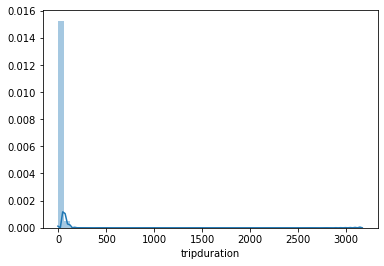

In [21]:
# the max value does not make sense. It must be an outlier, affecting our stats.
# check variable distribution
x = dockless['tripduration']
ax = sns.distplot(x)
plt.show()

In [22]:
# delete trip duration values above 240 min (=4 hours)
dockless = dockless[dockless['tripduration'] < 240]

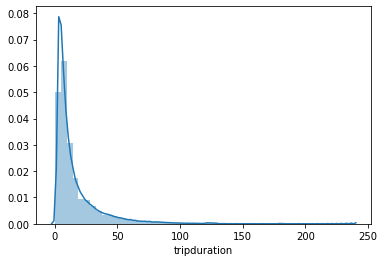

In [23]:
# plot again
x = dockless['tripduration']
ax = sns.distplot(x)
plt.show()

In [24]:
# delete trip duration values above 90 min (= 1.5 hours)
dockless = dockless[dockless['tripduration'] < 90]

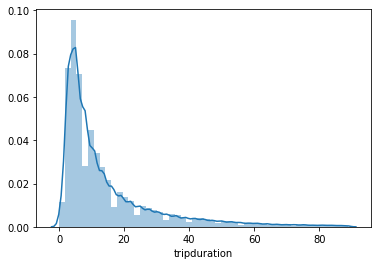

In [25]:
# plot again
x = dockless['tripduration']
ax = sns.distplot(x)
plt.show()

In [26]:
# count 
dockless['dayofweek'].value_counts()

Saturday     80179
Friday       67556
Thursday     58243
Sunday       54750
Wednesday    54438
Tuesday      51607
Monday       48916
Name: dayofweek, dtype: int64

<AxesSubplot:>

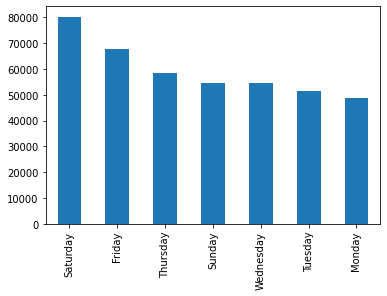

In [27]:
# plot the use of vehicles by days of the week
dockless['dayofweek'].value_counts().plot(kind='bar')

<AxesSubplot:>

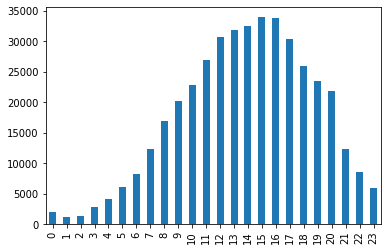

In [28]:
# plot the use of vehicles by hours of the day
dockless['hournum'].value_counts().plot(kind='bar')

array([[<AxesSubplot:title={'center':'Friday'}>,
        <AxesSubplot:title={'center':'Monday'}>,
        <AxesSubplot:title={'center':'Saturday'}>],
       [<AxesSubplot:title={'center':'Sunday'}>,
        <AxesSubplot:title={'center':'Thursday'}>,
        <AxesSubplot:title={'center':'Tuesday'}>],
       [<AxesSubplot:title={'center':'Wednesday'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

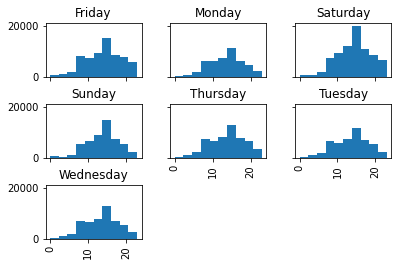

In [29]:
# is every day the same?
dockless['hournum'].hist(by=dockless['dayofweek'], sharex=True, sharey=True)

### 3. Look for dependencies between variables:
- correlation matrix with pearson coefficient
- heatmap

In [30]:
# pearson coefficient is a correlation indicator
# generate a pearson coefficient for each peer of variables
pearson = dockless.corr(method='pearson')
pearson

,tripduration,tripdistance,startlatitude,startlongitude,endlatitude,endlongitude,hournum
tripduration,1.000000,0.639269,0.096500,0.024883,0.014474,0.001710,0.124352
tripdistance,0.639269,1.000000,0.050120,0.027323,-0.031781,0.017751,0.080131
startlatitude,0.096500,0.050120,1.000000,-0.320198,0.179043,-0.166346,0.090373
startlongitude,0.024883,0.027323,-0.320198,1.000000,-0.076807,0.027550,0.022985
endlatitude,0.014474,-0.031781,0.179043,-0.076807,1.000000,-0.631182,0.010152
endlongitude,0.001710,0.017751,-0.166346,0.027550,-0.631182,1.000000,0.004858
hournum,0.124352,0.080131,0.090373,0.022985,0.010152,0.004858,1.000000


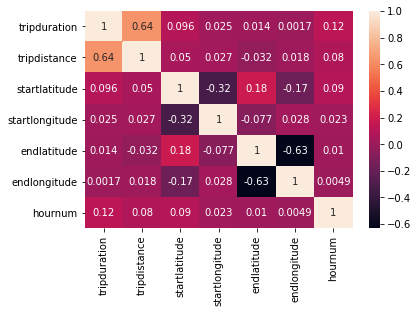

In [31]:
# visualize correlation between variables through a heatmap
sns.heatmap(pearson, annot=True)
plt.show()

### 4. Data visualization:
- plot the relationship of the most correlated variables (scatter plot of X / Y variables) => linear regression by adding a straight line on plot
- point lat/long on folium map
- draw edges between origin/destination
- aggregate datapoints to visualise it all

<AxesSubplot:xlabel='tripdistance', ylabel='tripduration'>

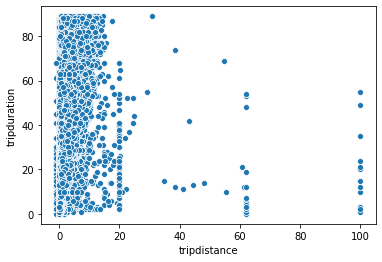

In [32]:
# scatter plot the relationship between trip distance and trip duration
sns.scatterplot(data=dockless, x="tripdistance", y="tripduration")

In [33]:
# too many data points to visualise a relationship
# select shorter data window
dockless = dockless[dockless['tripdistance'] < 20]

<AxesSubplot:xlabel='tripdistance', ylabel='tripduration'>

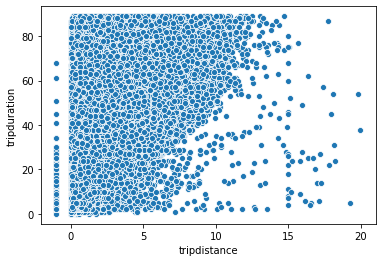

In [34]:
# plot the subset
sns.scatterplot(data=dockless, x="tripdistance", y="tripduration")

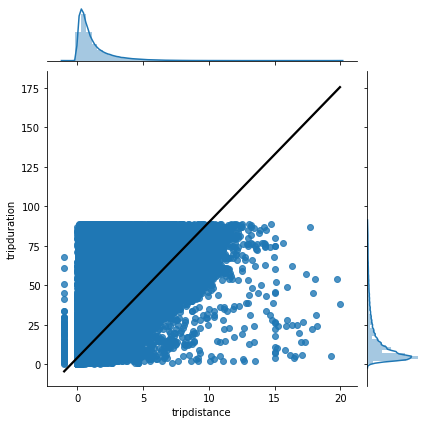

In [35]:
# add a linear regression line to the scatterplot
sns.jointplot(x="tripdistance", y="tripduration", data=dockless, kind='reg',joint_kws={'line_kws':{'color':'black'}})

<Figure size 720x720 with 0 Axes>

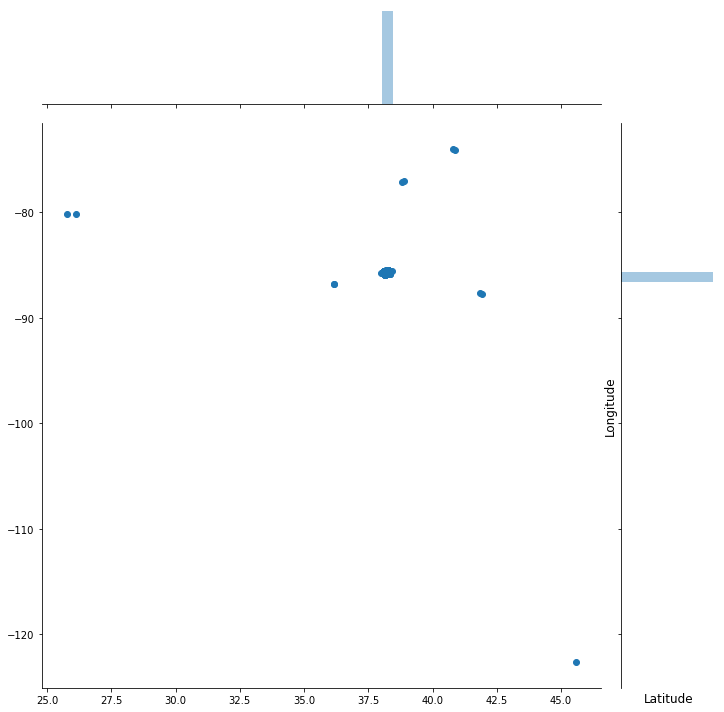

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [36]:
# visualise spatial distribution of data points
plt.figure(figsize = (10,10))
sns.jointplot(x=dockless.startlatitude.values, y = dockless.startlongitude.values, height = 10)
plt.ylabel('Longitude', fontsize = 12)
plt.xlabel('Latitude', fontsize = 12)
plt.show()
sns.despine
# there is hyper-concentration in center city and a few outliers

In [37]:
dockless.shape
# there are too many datapoints to visualise it all

(415569, 13)

In [38]:
# random selection of 1000 data points
sample = dockless.sample(n=1000)

<Figure size 720x720 with 0 Axes>

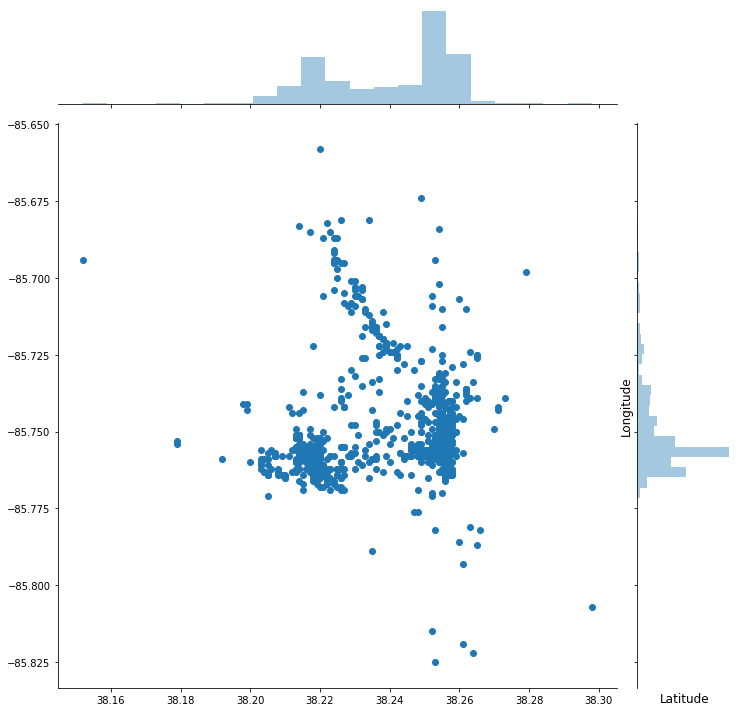

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [39]:
# what does our sample data looks like on this graph?
plt.figure(figsize = (10,10))
sns.jointplot(x=sample.startlatitude.values, y = sample.startlongitude.values, height = 10)
plt.ylabel('Longitude', fontsize = 12)
plt.xlabel('Latitude', fontsize = 12)
plt.show()
sns.despine

In [40]:
# visualise the spatial data points on maps
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

In [41]:
# enter Louisville coordinates
Louisville=[38.2527,-85.7585]

In [42]:
# map Louisville
map_louisville = folium.Map(location=Louisville,
                            zoom_start=12)
map_louisville

In [43]:
# map origin points
map_origin = folium.Map(location=Louisville,
                            zoom_start=12)

for lat, lng in zip(sample['startlatitude'],
                    sample['startlongitude']):
    folium.CircleMarker([lat, lng],
                        radius=2, 
                        stroke=False, 
                        fill_color='blue',
                        fill_opacity=0.5).add_to(map_origin)

map_origin

In [44]:
# map destination points
map_destination = folium.Map(location=Louisville,
                            zoom_start=12)

for lat, lng in zip(sample['endlatitude'],
                    sample['endlongitude']):
    folium.CircleMarker([lat, lng],
                        radius=2, 
                        stroke=False, 
                        fill_color='red',
                        fill_opacity=0.5).add_to(map_destination)

map_destination

In [45]:
map_trip = folium.Map(location=Louisville,
                            zoom_start=12)

for i, row in sample.iterrows():
    folium.CircleMarker([row['startlatitude'], row['startlongitude']],
                        radius=4,
                        stroke=False,
                        fill_color='blue',
                        fill_opacity=0.7).add_to(map_trip)
    
    folium.CircleMarker([row['endlatitude'], row['endlongitude']],
                        radius=4,
                        stroke=False,
                        fill_color='red',
                        fill_opacity=0.7).add_to(map_trip)
    
    folium.PolyLine([[row['startlatitude'], row['startlongitude']],
                    [row['endlatitude'], row['endlongitude']]],
                    strokeColor= "#000000"
                   ).add_to(map_trip)

map_trip

In [46]:
# cluster points to make the map more readable
map_cluster = folium.Map(location=Louisville,
                            zoom_start=12)

cluster = folium.plugins.MarkerCluster().add_to(map_cluster)

for lat, lng in zip(sample['startlatitude'],
                    sample['startlongitude']):
    folium.Marker([lat, lng]).add_to(cluster)
        
map_cluster

In [47]:
# visualise data points on a heatmap
heatmap = folium.Map(location=Louisville,
                            zoom_start=12)

HeatMap(data=sample[['startlatitude', 'startlongitude']].groupby(['startlatitude','startlongitude']).sum().reset_index().values.tolist(),
       radius=8, max_zoom=12).add_to(heatmap)

heatmap

In [48]:
# how does busyness evolves during the day ?
heatmapwithtime = folium.Map(location=Louisville,
                            zoom_start=12)

hour_list=[[] for x in range(24)]

for lat, lng, hour in zip(sample['startlatitude'],
                          sample['startlongitude'],
                          sample['hournum']):
    hour_list[hour].append([lat,lng])
    
index = [str(i)+':00' for i in range(24)]
    
HeatMapWithTime(hour_list, index, position='topright', auto_play=True).add_to(heatmapwithtime)
heatmapwithtime

### 5. Machine learning on mobility data
- Recall the research question
- Define X-y axes accordingly 
- split dataset in train/test subsets
- 1st run (compare accuracy scores) 
- plot predictions/actual data => want to refine your scores
- plot feature importance
- reduce feature redundancy
- 2nd run (compare accuracy scores) => better accuracy with refined datasets

# Research question
What data do we have at our disposal?
- origin/destination points
- trip duration
- trip distance
- day of the week
- hour of the day

Can we predict the hour of a trip from the day of the week ? NO. As seen above, all days has the same hours distribution.
Can we predict the day of the week from the trip duration ? If we can imagine that on the weekend the users are riding longer trips since they have more time, so far, we haven't found any evidence in the correlation matrix.
Can we predict the trip duration from the trip distance ? YES. Is it meaningful? Yes, as all GPS always predict your time of arrival when you enter a destination.

### We will use machine learning to predict the trip duration from a distance between origin and destination points.

#### since trip duration is a continuous numerical value, we will use regression models of ML
suppose we had a categorical value to predict, we would have used classification models

In [49]:
dockless.dtypes

tripid             object
startdate          object
starttime          object
enddate            object
endtime            object
tripduration      float64
tripdistance      float64
startlatitude     float64
startlongitude    float64
endlatitude       float64
endlongitude      float64
dayofweek          object
hournum             int64
dtype: object

In [50]:
# define X-y axis, excluding non-numerical values
y = dockless['tripduration'] # dependent variable
X = dockless.select_dtypes(exclude=['object']).drop(['tripduration'], axis=1)

In [51]:
# split dataset in train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 100)
# usually 1/3 train and 2/3 test selected randomly

In [52]:
# linear regression
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr_model =lr.fit(X_train, y_train)

lr_pred = lr_model.predict(X_test)

In [53]:
# calculate statistical measures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statistics

MAE = mean_absolute_error(y_test, lr_pred)
MSE = mean_squared_error(y_test, lr_pred)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, lr_pred)
print("MAE: %6.2f" % (MAE))
print("MSE: %6.2f" % (MSE))
print("RMSE: %6.2f" % (RMSE))
print("R2: %6.2f" % (R2))

MAE:   5.98
MSE:  98.48
RMSE:   9.92
R2:   0.59


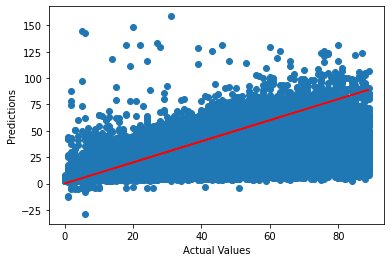

In [54]:
# Visualizing model performance
plt.scatter(y_test, lr_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')

# Ideal predictions plot
plt.plot(y_test,y_test,'r')

<AxesSubplot:xlabel='tripduration'>

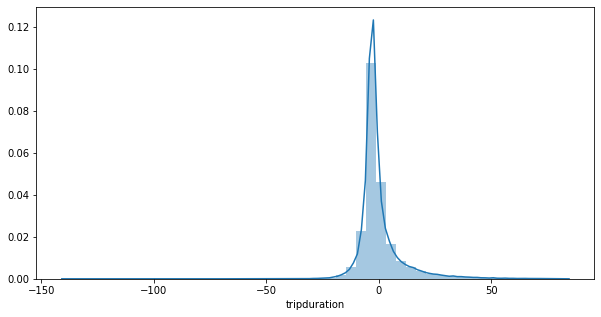

In [55]:
# Plotting residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- lr_pred)
sns.distplot(residuals)

#### not bad at all for a first run, but we will try to make it better (MAE < 5)
on way will be to use a meta estimator such as decision tree regressor to identify which feature contribute the most to the trip duration.

In [56]:
# import library
from sklearn.tree import DecisionTreeRegressor

# define the model with DecisionTreeRegressor
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train)

DecisionTreeRegressor()

0.6660951464066013
Feature: 0, Score: 0.66610
Feature: 1, Score: 0.06579
Feature: 2, Score: 0.06799
Feature: 3, Score: 0.06552
Feature: 4, Score: 0.07375
Feature: 5, Score: 0.06085


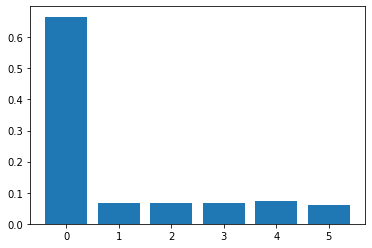

In [57]:
importance = model.feature_importances_

print(importance[0])

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### pretty clear that trip distance is the only feature of valuable importance to predict trip duration

In [58]:
# recursive feature elimination
from sklearn.feature_selection import RFE

# define method
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=1)
# fit the model
rfe.fit(X,y)
# transform the data
X_rfe = rfe.transform(X)
print("num features: %d" % rfe.n_features_)
print("selected features: %s" % rfe.support_)
print("feature ranking: %s" % rfe.ranking_)

num features: 1
selected features: [ True False False False False False]
feature ranking: [1 5 3 4 2 6]


In [59]:
# train/test split the new dataset
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size = 0.33, random_state = 100)

In [60]:
# linear regression on refined dataset
lr = linear_model.LinearRegression()
lr_model =lr.fit(X_train, y_train)

lr_pred2 = lr_model.predict(X_test)

In [61]:
# performance metrics
MAE2 = mean_absolute_error(y_test, lr_pred2)
MSE2 = mean_squared_error(y_test, lr_pred2)
RMSE2 = np.sqrt(MSE)
R22 = r2_score(y_test, lr_pred2)
print("MAE: %6.2f" % (MAE2))
print("MSE: %6.2f" % (MSE2))
print("RMSE: %6.2f" % (RMSE2))
print("R2: %6.2f" % (R22))

MAE:   6.08
MSE:  99.89
RMSE:   9.92
R2:   0.58


#### Reducing features didn't made the predictions better.

## Conclusion:
- this is how we program intelligent machines, which will learn more and more by analysing more data and seeing more case studies.
- when your accuracy score reachs a satisfying value (usually >95%) you can deploy your model for production on completely new datasets and assume the predictions will be valid. 
- in a more advanced fashion, we could make predictions on spatial data: for example trying to predict where in the city will most likely end a trip which started at a specific origin, or predicting from where a trip started by knowing its end destination and duration.
### Artificial intelligences are pure probabilities and statistics performed by performative brains (machines)!

now it is your turn to run the same performance on the other dataset "Louisville-Dockless-Trips.csv" you just have to follow the notebook line by line, filling the code with your data